### Detection of early stages of Depression on social media using Deep Learning techniques


I have used a dataset of 20,000 labeled English tweets collected via the Twitter API, with labels indicating whether the users who posted them are depressed or non-depressed. The tweets are preprocessed using standard NLP techniques such as tokenization, removing stop words, stemming or lemmatization, and converting the text into a numerical feature representation using bag-of-words or TF-IDF.
I have used the TextBlob library and various classifying algorithms, including Decision Tree, Random Forest Classifier, KNN Classifier, and Naïve Bayes, to analyze the preprocessed data and classify the tweets into depressed and non-depressed categories and have also used deep learning techniques like CNN, LSTM and GRU



### Exploratory Data Analysis: Data Pre-processing


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
df=pd.read_csv("/content/Mental-Health-Twitter.csv")
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


In [3]:
df.shape

(20000, 11)

In [4]:
df.isnull().sum() # check for missing values

Unnamed: 0      0
post_id         0
post_created    0
post_text       0
user_id         0
followers       0
friends         0
favourites      0
statuses        0
retweets        0
label           0
dtype: int64

In [5]:
# keep only the required columns
df = df[['post_text']]
df.head()

,post_text
0,It's just over 2 years since I was diagnosed w...
1,"It's Sunday, I need a break, so I'm planning t..."
2,Awake but tired. I need to sleep but my brain ...
3,RT @SewHQ: #Retro bears make perfect gifts and...
4,It’s hard to say whether packing lists are mak...


In [6]:
df.describe()

,post_text
count,20000
unique,19488
top,Oh crap! It's a trap! Aleph took damage.
freq,15


In [7]:
df.shape

(20000, 1)

### Text Cleaning:
Remove punctuation, numbers, stop words and convert tweets to lower case

In [8]:
# Change all characters in tweets to lower case
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove numbers from tweets
df["post_text"] = df["post_text"].str.replace("\d","")

# Remove punctuation from tweets
df["post_text"] = df["post_text"].str.replace("[^\w\s]","")

<ipython-input-8-1f0259b0d5e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["post_text"] = df["post_text"].apply(lambda x: " ".join(x.lower() for x in x.split()))
<ipython-input-8-1f0259b0d5e2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df["post_text"] = df["post_text"].str.replace("\d","")
<ipython-input-8-1f0259b0d5e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["post_text"] = df["post_text"].str.replace("\d","")
<ipython-input-8-1f025

Import TextBlob and NLTK (Natural Language Toolkit) which are used for natural language processing (NLP) tasks.

**TextBlob** provides a more user-friendly API for common NLP tasks such as **sentiment analysis, part-of-speech tagging, and text classification**.

**NLTK** provides a wide range of functionalities for tasks such as tokenization, stemming, lemmatization, parsing, and more. It also includes a vast array of corpora and datasets for language modeling and machine learning.

In [9]:
!pip install textblob
!pip install nltk

from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

In [10]:
# Remove stop words
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
sw = stopwords.words("english")
df["post_text"] = df["post_text"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Lemmatization and Word tokenization

In [11]:
!pip install textblob
from textblob import TextBlob

In [12]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

unzip:  cannot find or open /usr/share/nltk_data/corpora/wordnet.zip, /usr/share/nltk_data/corpora/wordnet.zip.zip or /usr/share/nltk_data/corpora/wordnet.zip.ZIP.


In [13]:
# Lemmatization (to group similar words together)
from textblob import Word
nltk.download("wordnet")
nltk.download("omw-1.4")
df["post_text"] = df["post_text"].apply(lambda x: " ".join([Word(x).lemmatize()]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [14]:
# tokenize each word
nltk.download('punkt')
from nltk.tokenize import word_tokenize
df["tokens"] = df["post_text"].apply(lambda x: TextBlob(x).words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [15]:
df.head()

,post_text,tokens
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,..."
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit..."
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]"
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts..."
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l..."


# Sentiment Analysis
We will employ TextBlob, a Python library, to conduct sentiment analysis on our preprocessed text data. The objective is to classify each tweet as either exhibiting signs of depression or not, based on its sentiment score. Sentiment analysis is an NLP technique that entails analyzing the emotional tone of text, with the goal of automatically classifying it as positive, negative, or neutral, depending on the words and phrases used. TextBlob utilizes a machine learning algorithm to analyze text and assign a sentiment score ranging from -1 to +1, where a score of -1 indicates a very negative sentiment, +1 indicates a very positive sentiment, and 0 indicates a neutral sentiment. By analyzing tweets using TextBlob's sentiment analysis, we can categorize them as depressed or non-depressed based on their sentiment scores. For example, a tweet with a sentiment score of -0.8 might be classified as depressed, while a tweet with a sentiment score of +0.5 may be classified as non-depressed.

In [16]:
# Applying sentiment to entire dataset

blob_emptylist = []

for i in df["post_text"]:
    blob = TextBlob(i).sentiment # returns polarity
    blob_emptylist.append(blob)

In [17]:
# Creating a new dataframe to show polarity and subjectivity for each tweet
df2 = pd.DataFrame(blob_emptylist)
df2.head()

,polarity,subjectivity
0,0.100000,1.000000
1,-0.093750,0.750000
2,-0.400000,0.700000
3,0.900000,0.875000
4,-0.045833,0.370833


In [18]:
# Combine both df and df2
df3 = pd.concat([df.reset_index(drop=True), df2], axis=1)
df3.head()

,post_text,tokens,polarity,subjectivity
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000,1.000000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,0.750000
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000,0.700000
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,0.875000
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833,0.370833


In [19]:
# we only care about Positive or Negative hence drop subjectivity and only look at polarity
df4 = df3[['post_text','tokens','polarity']]
df4.head(6)

,post_text,tokens,polarity
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833
5,making packing lists new hobby movinghouse,"[making, packing, lists, new, hobby, movinghouse]",0.136364


In [20]:
# Sentiment value
df4["Sentiment"] =  np.where(df4["polarity"] >= 0 , "Positive", "Negative")
df4.head()

,post_text,tokens,polarity,Sentiment
0,years since diagnosed anxiety depression today...,"[years, since, diagnosed, anxiety, depression,...",0.100000,Positive
1,sunday need break im planning spend little tim...,"[sunday, need, break, im, planning, spend, lit...",-0.093750,Negative
2,awake tired need sleep brain ideas,"[awake, tired, need, sleep, brain, ideas]",-0.400000,Negative
3,rt sewhq retro bears make perfect gifts great ...,"[rt, sewhq, retro, bears, make, perfect, gifts...",0.900000,Positive
4,hard say whether packing lists making life eas...,"[hard, say, whether, packing, lists, making, l...",-0.045833,Negative


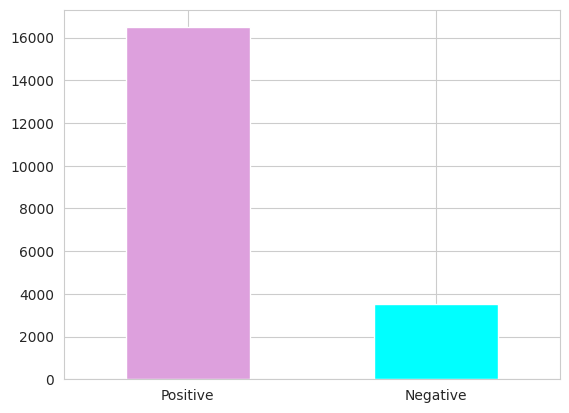

In [21]:
result = df4["Sentiment"].value_counts()

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
result.plot(kind="bar", rot=0, color=["plum","cyan"]);

In [22]:
df4.groupby("Sentiment").count()

,post_text,tokens,polarity
Sentiment,,,
Negative,3517,3517,3517
Positive,16483,16483,16483


In [23]:
df4.groupby("polarity").max().head(5)
# returns the tweets with maximum polarity i.e. most negative tweets

,post_text,tokens,Sentiment
polarity,,,
-1.000000,worst bumbling stumbling statement ive seen in...,"[worst, bumbling, stumbling, statement, ive, s...",Negative
-0.900000,sickening httpstcokoohihbrx,"[sickening, httpstcokoohihbrx]",Negative
-0.900000,keitholbermann thats one word would go traitor...,"[keitholbermann, thats, one, word, would, go, ...",Negative
-0.875000,gop lawmaker asks twitter vote whether obamaca...,"[gop, lawmaker, asks, twitter, vote, whether, ...",Negative
-0.857143,sick perceived anything everything im told dri...,"[sick, perceived, anything, everything, im, to...",Negative


## Visualizing the results

Text(0.5, 1.0, 'Polarity Distribution')

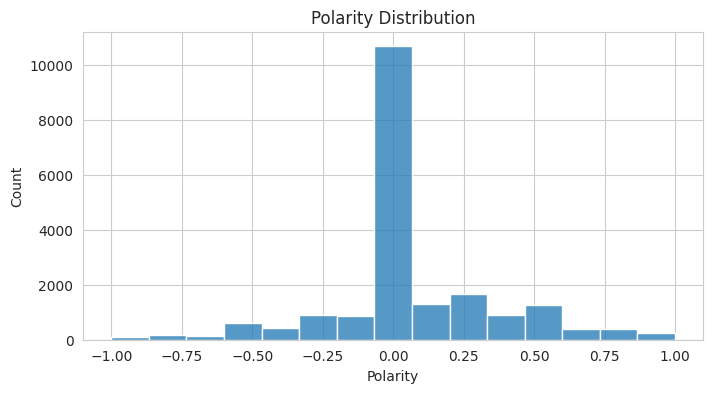

In [24]:
#Visualizing distribution of polarity
plt.figure(figsize=(8,4))
sns.histplot(df4['polarity'], bins=15, kde=False)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Polarity Distribution')

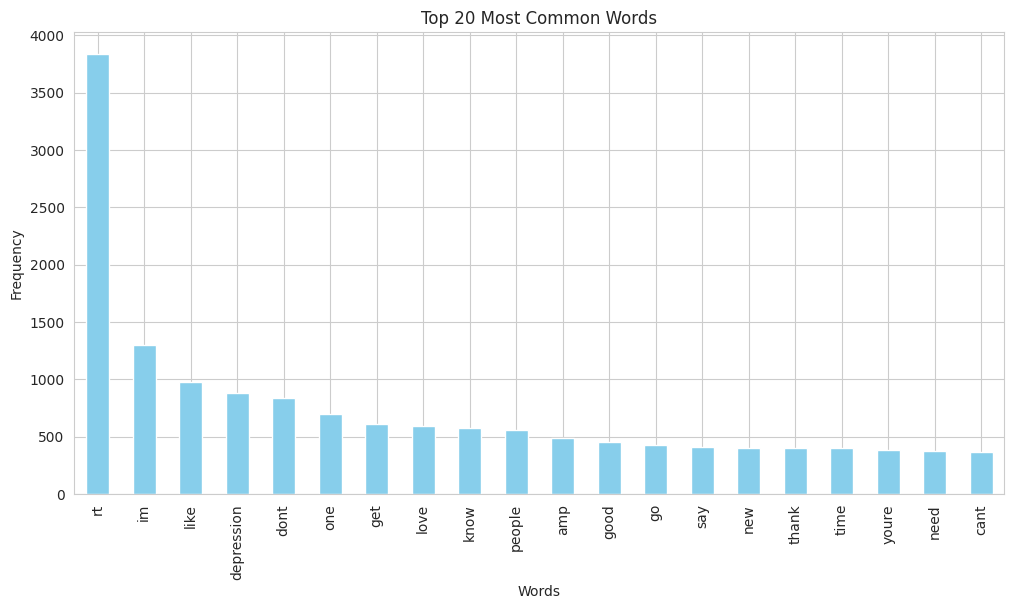

<ipython-input-25-2d3fe2fe8e24>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[target_word, 'Other Words'], y=[target_word_occurrences, word_counts_df.sum().sum() - target_word_occurrences], palette=['skyblue', 'gray'])


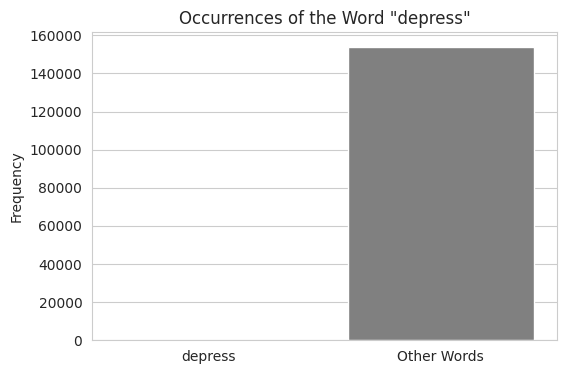

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


cleaned_text = df4['post_text']

# Creating a CountVectorizer to convert text data into a bag-of-words
vectorizer = CountVectorizer()
word_counts = vectorizer.fit_transform(cleaned_text)

# Converting the word counts to a DataFrame
word_counts_df = pd.DataFrame(word_counts.toarray(), columns=vectorizer.get_feature_names_out())

# Visualizing the most common words
plt.figure(figsize=(12, 6))
word_counts_df.sum().sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Highlighting occurrences of the word "depress" or any other form
target_word = 'depress'
target_word_occurrences = word_counts_df[target_word].sum()

# Visualizing occurrences of the target word
plt.figure(figsize=(6, 4))
sns.barplot(x=[target_word, 'Other Words'], y=[target_word_occurrences, word_counts_df.sum().sum() - target_word_occurrences], palette=['skyblue', 'gray'])
plt.title(f'Occurrences of the Word "{target_word}"')
plt.ylabel('Frequency')
plt.show()


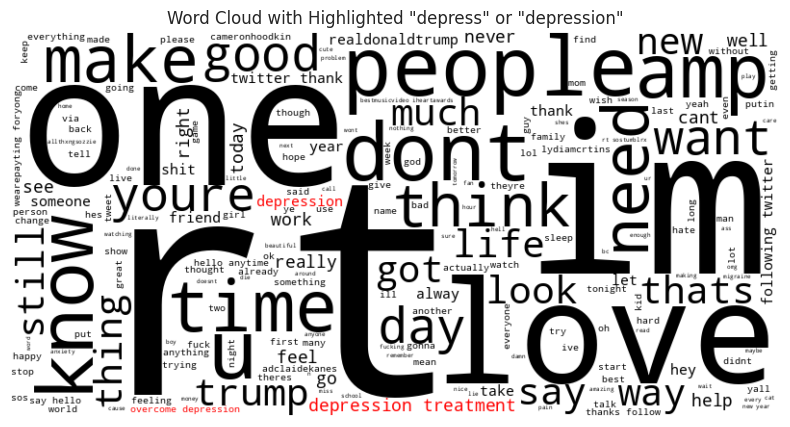

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cleaned_text = df4['post_text']

# Joining the cleaned text into a single string
text_combined = ' '.join(cleaned_text)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Highlight occurrences of the word "depress" or "depression" in red
wordcloud.recolor(color_func=lambda word, font_size, position, orientation, random_state=None, **kwargs: 'red' if 'depress' in word.lower() or 'depression' in word.lower() else 'black')

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with Highlighted "depress" or "depression"')
plt.show()


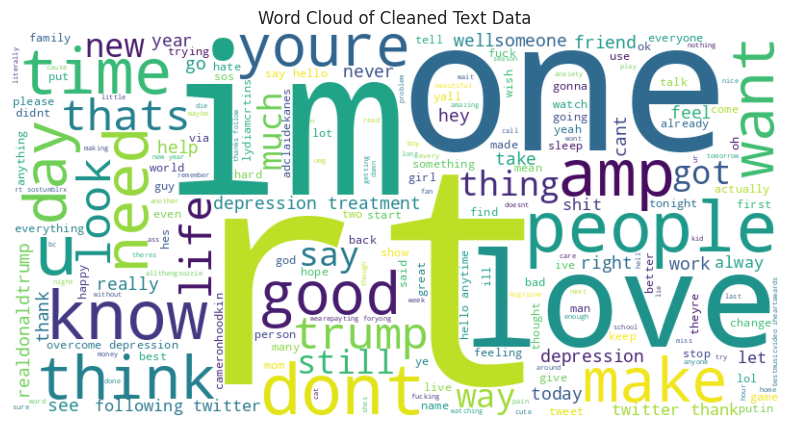

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming df4['post_text'] contains your cleaned text data
cleaned_text = ' '.join(df4['post_text'])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)

# Displaying the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Text Data')
plt.show()


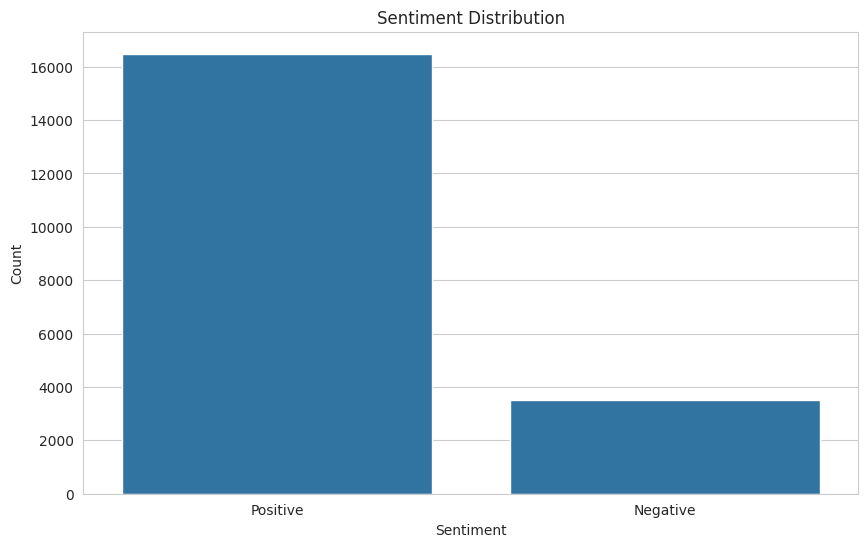

In [28]:
# Visualizing distribution of sentiment
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=df4,order=df4['Sentiment'].value_counts().index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
# split the data into test and train set
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42)

In [31]:
# Converting the text data into numerical features using a CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [32]:
# Training a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the testing set
accuracy = clf.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.93875


In [33]:
# Create a classification report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.80      0.88      0.84       718
    Positive       0.97      0.95      0.96      3282

    accuracy                           0.94      4000
   macro avg       0.89      0.92      0.90      4000
weighted avg       0.94      0.94      0.94      4000



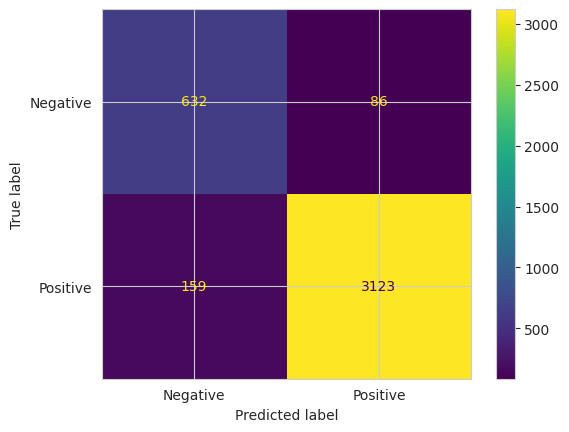

In [34]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [35]:
# Checking to see if the decision tree is overfitting or underfitting
print('The training score is',round(clf.score(X_train, y_train)*100,2),'%')
print('The testing score is',round(clf.score(X_test, y_test)*100,2),'%')

The training score is 100.0 %
The testing score is 93.88 %


In [36]:
# checking to see if data is balanced
df4['Sentiment'].value_counts()

Positive    16483
Negative     3517
Name: Sentiment, dtype: int64

# Random Forest Classifier

In [37]:
# creating a Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
# Evaluating the classifier on the testing set
accuracy = rfc.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.931


In [39]:
# Getting the accuracy score of the model
print('The accuracy of the Random Forest Classifier is',round(accuracy_score(rfc.predict(X_test), y_test)*100,2),'%')

The accuracy of the Random Forest Classifier is 93.1 %


In [40]:
# Creating a classification report
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.79      0.83      0.81       718
    Positive       0.96      0.95      0.96      3282

    accuracy                           0.93      4000
   macro avg       0.88      0.89      0.88      4000
weighted avg       0.93      0.93      0.93      4000



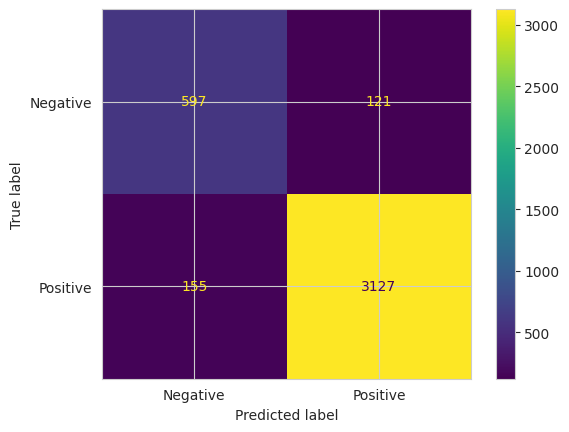

In [41]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, rfc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot()

# KNN Classifier

In [42]:
# creating a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# Evaluating the classifier on the testing set
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.84575


In [44]:
# Getting the accuracy score of the model
print('The accuracy of the KNN Classifier is',round(accuracy_score(knn.predict(X_test), y_test)*100,2),'%')

The accuracy of the KNN Classifier is 84.58 %


In [45]:
# Creating a classification report
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.82      0.18      0.29       718
    Positive       0.85      0.99      0.91      3282

    accuracy                           0.85      4000
   macro avg       0.83      0.59      0.60      4000
weighted avg       0.84      0.85      0.80      4000



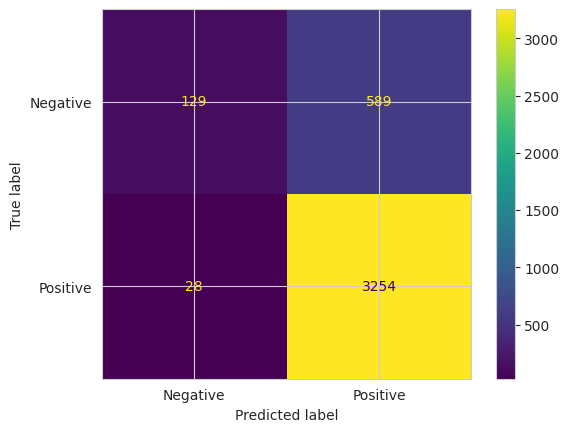

In [46]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, knn.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

# Naive Bayes

In [47]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train, y_train)

# Making predictions on the test data
y_pred = nb.predict(X_test)

# Evaluating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.882


In [48]:
# Create a classification report
print(classification_report(y_test, nb.predict(X_test)))

              precision    recall  f1-score   support

    Negative       0.87      0.40      0.55       718
    Positive       0.88      0.99      0.93      3282

    accuracy                           0.88      4000
   macro avg       0.88      0.69      0.74      4000
weighted avg       0.88      0.88      0.86      4000



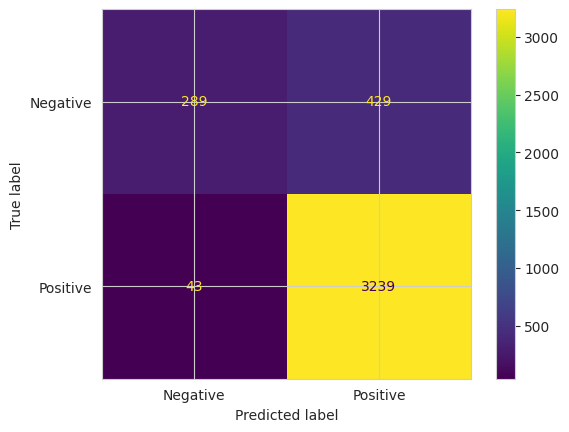

In [49]:
# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, nb.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()

In [50]:
#!pip install transformers
#import tensorflow as tf
#from transformers import BertTokenizer, TFBertModel
#from sklearn.model_selection import train_test_split

# Load BERT tokenizer and model
#okenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and pad the input data
#max_length = 128
#X = df4['post_text'].values
#X = [" ".join(x) for x in X]
#X_train, X_test, y_train, y_test = train_test_split(X, df4['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the data
#X_train_tokens = tokenizer(X_train, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)
#X_test_tokens = tokenizer(X_test, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)

# Obtain BERT embeddings
#train_embeddings = model(X_train_tokens)
#test_embeddings = model(X_test_tokens)





In [51]:
#!pip install transformers
#import tensorflow as tf
#from transformers import BertTokenizer, TFBertModel
#from sklearn.model_selection import train_test_split

# Load a smaller BERT model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased-small')
#model = TFBertModel.from_pretrained('bert-base-uncased-small')

# Tokenize and pad the input data
#max_length = 128
#X = df4['post_text'].values
#X = [" ".join(x) for x in X]
#X_train, X_test, y_train, y_test = train_test_split(X, df4['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the data
#X_train_tokens = tokenizer(X_train, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)
#X_test_tokens = tokenizer(X_test, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)

# Obtain BERT embeddings
#train_embeddings = model(X_train_tokens)
#test_embeddings = model(X_test_tokens)


In [52]:
#!pip install transformers
#import tensorflow as tf
#from transformers import BertTokenizer, TFBertModel
#from sklearn.model_selection import train_test_split

# Load a smaller BERT model
#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and pad the input data
#max_length = 128
#X = df4['post_text'].values
#X = [" ".join(x) for x in X]
#X_train, X_test, y_train, y_test = train_test_split(X, df4['Sentiment'], test_size=0.2, random_state=42)

# Tokenize the data
#X_train_tokens = tokenizer(X_train, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)
#X_test_tokens = tokenizer(X_test, padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)

# Obtain BERT embeddings
#train_embeddings = model(X_train_tokens)
#test_embeddings = model(X_test_tokens)



In [53]:
!pip install tensorflow

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from sklearn.model_selection import train_test_split

# Tokenizing and pad the input data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df4['post_text'])
X = tokenizer.texts_to_sequences(df4['post_text'])
X = pad_sequences(X, maxlen=max_len)

X_train, X_test, y_train, y_test = train_test_split(X, df4['Sentiment'], test_size=0.2, random_state=42)

# Build CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, 128))  # Removed input_length parameter
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))



In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# Tokenizing and pad the input data
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df4['post_text'])
X = tokenizer.texts_to_sequences(df4['post_text'])
X = pad_sequences(X, maxlen=max_len)

# Encoding the sentiment labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df4['Sentiment'])

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Build CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, 128))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(1, activation='sigmoid'))


In [56]:
#
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.losses import binary_crossentropy
#from tensorflow.keras.metrics import Accuracy


# Convert target variable to float32
#y_train = y_train.astype('float32')
#y_test = y_test.astype('float32')

# Compile the model
#model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
                  '''loss=binary_crossentropy,
                  metrics=[Accuracy()])'''

# Print the model summary
#model_cnn.summary()

# Train the model
#batch_size = 32
#epochs = 10

#history = model_cnn.fit(X_train, y_train,
                        '''epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2)  # You can adjust the validation split as needed

# Evaluate the model on the test set
loss, accuracy = model_cnn.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')'''


IndentationError: unexpected indent (<ipython-input-56-19f495682e23>, line 13)

In [58]:
from sklearn.preprocessing import LabelEncoder

# Converting the target variable to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Compiling the model
model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Print the model summary
model_cnn.summary()

# Training the model
batch_size = 32
epochs = 10

history = model_cnn.fit(X_train, y_train_encoded,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.2)

# Evaluating the model on the test set
loss, accuracy = model_cnn.evaluate(X_test, y_test_encoded, batch_size=batch_size)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')


NameError: name 'Adam' is not defined

125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


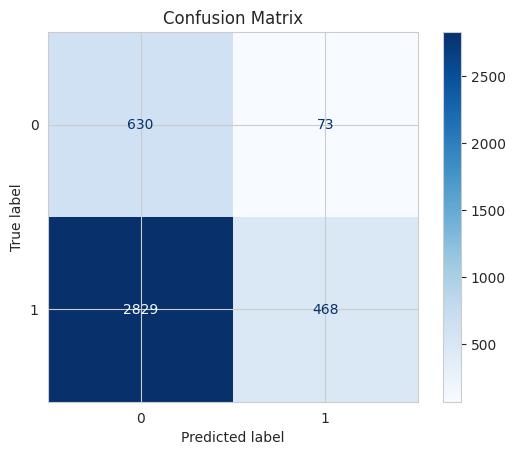

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model_cnn.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Computing confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


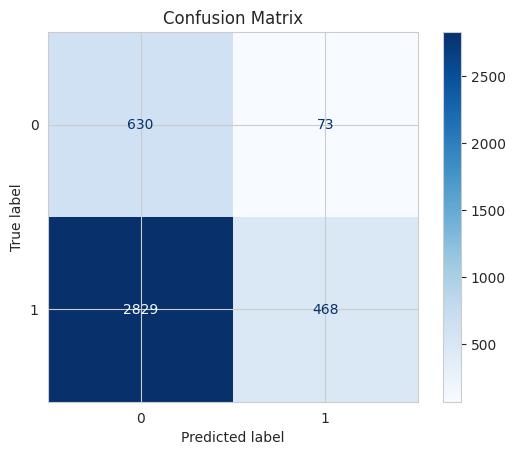

TypeError: object of type 'numpy.int64' has no len()

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model_cnn.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Computing confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Printing the classification report
report = classification_report(y_test_encoded, y_pred_binary, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


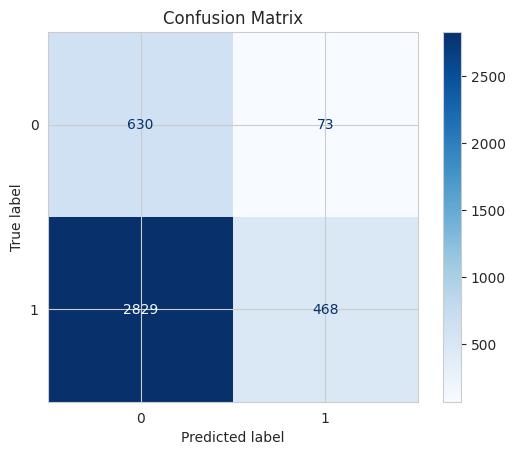

Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.90      0.30       703
           1       0.87      0.14      0.24      3297

    accuracy                           0.27      4000
   macro avg       0.52      0.52      0.27      4000
weighted avg       0.75      0.27      0.25      4000



In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predictions on the test set
y_pred = model_cnn.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Computing confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Convert label_encoder.classes_ to a list of strings
class_labels = list(map(str, label_encoder.classes_))

# Printing the classification report
report = classification_report(y_test_encoded, y_pred_binary, target_names=class_labels)
print("Classification Report:\n", report)


In [60]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = model_cnn.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Generating classification report
report = classification_report(y_test_encoded, y_pred_binary, target_names=label_encoder.classes_)

# Printing the classification report
print("Classification Report:")
print(report)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


TypeError: object of type 'numpy.int64' has no len()

In [63]:
from tensorflow.keras.layers import GRU

# Building GRU model
model_gru = Sequential()
model_gru.add(Embedding(max_words, 128))
model_gru.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model_gru.add(Dense(1, activation='sigmoid'))





In [70]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df4['Sentiment'] is the target variable
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42, stratify=df4['Sentiment'])

# Tokenize and pad the input data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build GRU model
model_gru = Sequential()
model_gru.add(Embedding(max_words, 128))
model_gru.add(GRU(128))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
model_gru.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Print the model summary
model_gru.summary()

# Tokenize and pad the test data
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

# Predictions on the test set
y_pred = model_gru.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Print classification report
report = classification_report(label_encoder.transform(y_test), y_pred_binary, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)            │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ gru_2 (GRU)                        │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_4 (Dense)                    │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.20      0.44      0.28       703
    Positive       0.84      0.63      0.72      3297

    accuracy                           0.60      4000
   macro avg       0.52      0.54      0.50      4000
weighted avg       0.73      0.60      0.64      4000



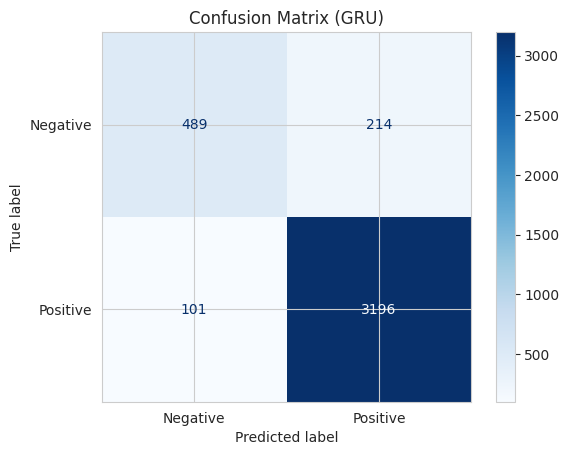

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Computing confusion matrix
cm_gru = confusion_matrix(label_encoder.transform(y_test), y_pred_binary)

# Displaying the confusion matrix
disp_gru = ConfusionMatrixDisplay(confusion_matrix=cm_gru, display_labels=label_encoder.classes_)
disp_gru.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (GRU)')
plt.show()

In [69]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Assuming df4['Sentiment'] is the target variable
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42, stratify=df4['Sentiment'])

# Tokenize and pad the input data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build GRU model
model_gru = Sequential()
model_gru.add(Embedding(max_words, 128))
model_gru.add(GRU(128))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
model_gru.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Print the model summary
model_gru.summary()

# Train the model with early stopping and stratification
batch_size = 32
epochs = 10
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_gru = model_gru.fit(X_train, y_train_encoded,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            callbacks=[early_stopping])

# Predictions on the test set
y_pred = model_gru.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Print classification report
report = classification_report(label_encoder.transform(y_test), y_pred_binary, target_names=label_encoder.classes_)
print("Classification Report:\n", report)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)            │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ gru_1 (GRU)                        │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_3 (Dense)                    │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0000e+00 - loss: 0.5377 - val_accuracy: 0.0000e+00 - val_loss: 0.4409
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.4055 - val_accuracy: 0.0000e+00 - val_loss: 0.3151
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.2116 - val_accuracy: 0.0000e+00 - val_loss: 0.2211
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0965 - val_accuracy: 0.0000e+00 - val_loss: 0.2014
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 6.4720e-05 - loss: 0.0577 - val_accuracy: 0.0012 - val_loss: 0.2155
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0028 - loss: 0.0348 - val_accuracy: 0.0047 - val_loss: 0.2187
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.0078 - loss: 0.0225 - val_accuracy: 0.0116 - val_loss: 0.2368


UnimplementedError: Graph execution error:

Detected at node sequential_3_1/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-69-1981583f3a11>", line 52, in <cell line: 52>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 511, in predict

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 212, in one_step_on_data_distributed

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 201, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 93, in predict_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py", line 831, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 118, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/operation.py", line 42, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 157, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/sequential.py", line 203, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 180, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 288, in _standardize_inputs

  File "/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py", line 253, in _convert_inputs_to_tensors

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 483, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 117, in convert_to_tensor

Cast string to float is not supported
	 [[{{node sequential_3_1/Cast}}]] [Op:__inference_one_step_on_data_distributed_73998]

In [67]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy  # Add this import

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

# Assuming y_train contains string labels like "Positive" and "Negative"
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Compiling the GRU model
model_gru.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Printing the GRU model summary
model_gru.summary()

# Training the GRU model with early stopping
batch_size = 32
epochs = 10

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_gru = model_gru.fit(X_train, y_train_encoded,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            callbacks=[early_stopping])



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)            │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ gru (GRU)                          │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_2 (Dense)                    │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 50s 112ms/step - accuracy: 0.0035 - loss: 0.5430 - val_accuracy: 0.0000e+00 - val_loss: 0.5137
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 44s 111ms/step - accuracy: 0.0000e+00 - loss: 0.4441 - val_accuracy: 0.0000e+00 - val_loss: 0.4480
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 111ms/step - accuracy: 0.0120 - loss: 0.3808 - val_accuracy: 0.0000e+00 - val_loss: 0.3518
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 111ms/step - accuracy: 1.8866e-04 - loss: 0.2384 - val_accuracy: 0.0000e+00 - val_loss: 0.2730
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.0000e+00 - loss: 0.1566 - val_accuracy: 0.0000e+00 - val_loss: 0.2434
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 112ms/step - accuracy: 0.0000e+00 - loss: 0.1069 - val_accuracy: 0.0000e+00 - val_loss: 0.2320
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 45s 114ms/step - accuracy: 0.0000e+00 - loss: 0.0758 - val_accuracy: 0.0000e+00 - val_loss: 0.2343
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━

In [68]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = model_gru.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Generating classification report
report = classification_report(y_test_encoded, y_pred_binary, target_names=label_encoder.classes_)

# Printing the classification report
print("Classification Report:")
print(report)

125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
# Predictions on the test set
y_pred = model_gru.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Computing confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [71]:
from tensorflow.keras.layers import LSTM

# Building LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128))  # Remove input_length argument
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))



In [73]:
from tensorflow.keras.layers import LSTM
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Assuming df4['Sentiment'] is the target variable
X_train, X_test, y_train, y_test = train_test_split(df4['post_text'], df4['Sentiment'], test_size=0.2, random_state=42, stratify=df4['Sentiment'])

# Tokenize and pad the input data
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen=max_len)

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128))
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the LSTM model
model_lstm.compile(optimizer=Adam(learning_rate=1e-4),
                   loss=binary_crossentropy,
                   metrics=[Accuracy()])

# Print the LSTM model summary
model_lstm.summary()

# Training the LSTM model with early stopping
batch_size = 32
epochs = 10

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train_encoded,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_split=0.2,
                              callbacks=[early_stopping])

# Tokenize and pad the test data
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test, maxlen=max_len)

# Predictions on the test set
y_pred = model_lstm.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Print classification report
report_lstm = classification_report(label_encoder.transform(y_test), y_pred_binary, target_names=label_encoder.classes_)
print("Classification Report (LSTM):\n", report_lstm)

# Computing confusion matrix
cm_lstm = confusion_matrix(label_encoder.transform(y_test), y_pred_binary)
print("Confusion Matrix (LSTM):\n", cm_lstm)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)            │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_2 (LSTM)                      │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_7 (Dense)                    │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.0000e+00 - loss: 0.5157 - val_accuracy: 0.0000e+00 - val_loss: 0.4532
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.0000e+00 - loss: 0.4385 - val_accuracy: 0.0000e+00 - val_loss: 0.4178
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.0000e+00 - loss: 0.3604 - val_accuracy: 0.0000e+00 - val_loss: 0.2907
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.0000e+00 - loss: 0.2047 - val_accuracy: 0.0000e+00 - val_loss: 0.2298
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 86ms/step - accuracy: 0.0000e+00 - loss: 0.1254 - val_accuracy: 0.0000e+00 - val_loss: 0.2106
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0943 - val_accuracy: 0.0000e+00 - val_loss: 0.2112
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.0000e+00 - loss: 0.0673 - val_accuracy: 0.0000e+00 - val_loss: 0.2192
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━

In [72]:
from tensorflow.keras.layers import LSTM

# Building LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(max_words, 128))  # Remove input_length argument
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compiling the LSTM model
model_lstm.compile(optimizer=Adam(learning_rate=1e-4),
                   loss=binary_crossentropy,
                   metrics=[Accuracy()])

# Printing the LSTM model summary
model_lstm.summary()

# Training the LSTM model with early stopping
batch_size = 32
epochs = 10

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_lstm = model_lstm.fit(X_train, y_train_encoded,
                              epochs=epochs,
                              batch_size=batch_size,
                              validation_split=0.2,
                              callbacks=[early_stopping])

# Evaluating the LSTM model on the test set
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test_encoded, batch_size=batch_size)
print(f'Test Loss: {loss_lstm:.4f}, Test Accuracy: {accuracy_lstm:.4f}')



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)            │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ lstm_1 (LSTM)                      │ ?                             │ 0 (unbuilt) │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ dense_6 (Dense)                    │ ?                             │ 0 (unbuilt) │
└────────────────────────────────────┴───────────────────────────────┴─────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 37s 87ms/step - accuracy: 0.0000e+00 - loss: 0.5190 - val_accuracy: 0.0000e+00 - val_loss: 0.4537
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.0000e+00 - loss: 0.4418 - val_accuracy: 0.0000e+00 - val_loss: 0.4170
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.0000e+00 - loss: 0.3588 - val_accuracy: 0.0000e+00 - val_loss: 0.2927
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 86ms/step - accuracy: 0.0000e+00 - loss: 0.2123 - val_accuracy: 0.0000e+00 - val_loss: 0.2304
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.0000e+00 - loss: 0.1361 - val_accuracy: 0.0000e+00 - val_loss: 0.2160
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 35s 87ms/step - accuracy: 0.0000e+00 - loss: 0.0906 - val_accuracy: 0.0000e+00 - val_loss: 0.2081
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 34s 85ms/step - accuracy: 0.0000e+00 - loss: 0.0672 - val_accuracy: 0.0000e+00 - val_loss: 0.2193
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━

In [75]:
from sklearn.metrics import classification_report

# Predictions on the test set
y_pred = model_lstm.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Generating classification report
report = classification_report(y_test_encoded, y_pred_binary, target_names=label_encoder.classes_)

# Printing the classification report
print("Classification Report:")
print(report)

125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.70      0.76       703
    Positive       0.94      0.97      0.95      3297

    accuracy                           0.92      4000
   macro avg       0.88      0.83      0.85      4000
weighted avg       0.92      0.92      0.92      4000



125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


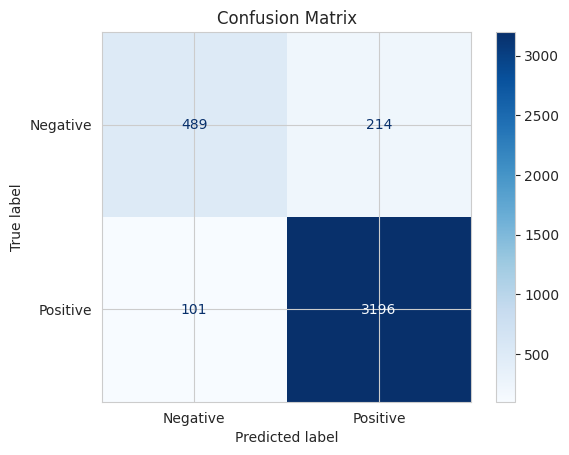

In [76]:
# Predictions on the test set
y_pred = model_lstm.predict(X_test)

# Threshold of the predictions to get binary labels
threshold = 0.5
y_pred_binary = (y_pred > threshold).astype('int')

# Computing confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_binary)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install tensorflow

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


In [ ]:
!pip install scikeras

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: 0.7021
Ensemble Test Loss: 0.7019, Ensemble Test Accuracy: 0.0000
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.7021
Ensemble Test Loss: 0.7019, Ensemble Test Accuracy: 0.0000


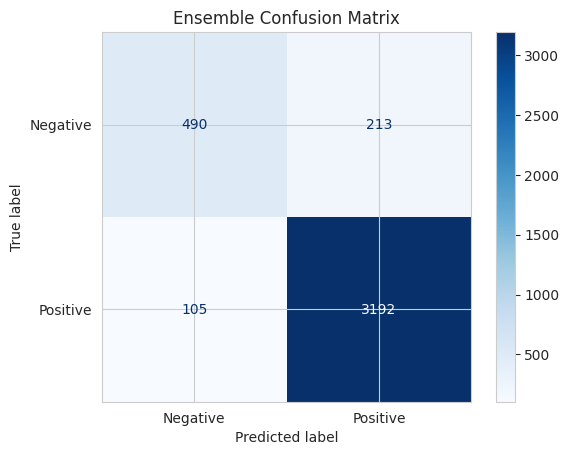

Ensemble Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.70      0.76       703
    Positive       0.94      0.97      0.95      3297

    accuracy                           0.92      4000
   macro avg       0.88      0.83      0.85      4000
weighted avg       0.92      0.92      0.92      4000



In [78]:
# Compile the ensemble model
model_cnn.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Evaluate the ensemble on the test set
loss_ensemble, accuracy_ensemble = model_cnn.evaluate(X_test, y_test_encoded, batch_size=batch_size)
print(f'Ensemble Test Loss: {loss_ensemble:.4f}, Ensemble Test Accuracy: {accuracy_ensemble:.4f}')


y_pred_cnn = model_cnn.predict(X_test)
y_pred_gru = model_gru.predict(X_test)
y_pred_lstm = model_lstm.predict(X_test)

# Average the predictions
y_pred_ensemble = (y_pred_cnn + y_pred_gru + y_pred_lstm) / 3.0

# Threshold of the ensemble predictions to get binary labels
threshold = 0.5
y_pred_ensemble_binary = (y_pred_ensemble > threshold).astype('int')

# Evaluating the ensemble on the test set
loss_ensemble, accuracy_ensemble = model_cnn.evaluate(X_test, y_test_encoded, batch_size=batch_size)
print(f'Ensemble Test Loss: {loss_ensemble:.4f}, Ensemble Test Accuracy: {accuracy_ensemble:.4f}')

# Confusion matrix for the ensemble
cm_ensemble = confusion_matrix(y_test_encoded, y_pred_ensemble_binary)
disp_ensemble = ConfusionMatrixDisplay(confusion_matrix=cm_ensemble, display_labels=label_encoder.classes_)
disp_ensemble.plot(cmap='Blues', values_format='d')
plt.title('Ensemble Confusion Matrix')
plt.show()

# Classification report for the ensemble
report_ensemble = classification_report(y_test_encoded, y_pred_ensemble_binary, target_names=label_encoder.classes_)
print("Ensemble Classification Report:")
print(report_ensemble)

In [ ]:

# Use scikit-learn to grid search the batch size and epochs
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
# Function to create model, required for KerasClassifier


In [ ]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define the function to create the CNN model
def create_cnn_model(optimizer='adam', kernel_size=5):
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(Conv1D(128, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer,
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

    return model

# Convert target variable to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a KerasClassifier
model_cnn_clf = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define the parameter grid to search
param_grid = {
    'epochs': [5, 10],
    'batch_size': [32, 64],
    'kernel_size': [3, 5],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_cnn_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train_encoded)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build a new CNN model
best_cnn_model = create_cnn_model(**best_params)

# Train the new model on the full training set
best_cnn_model.fit(X_train, y_train_encoded, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the best model on the test set
loss, accuracy = best_cnn_model.evaluate(X_test, y_test_encoded, batch_size=best_params['batch_size'])
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}') '''


In [ ]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define the function to create the CNN model
def create_cnn_model(optimizer='adam', kernel_size=5):
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(Conv1D(128, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer,
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

    return model

# Convert target variable to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a KerasClassifier
model_cnn_clf = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define the parameter grid to search
param_grid = {
    'epochs': [5, 10],
    'batch_size': [32, 64],
    'kernel_size': [3, 5],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_cnn_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train_encoded)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build a new CNN model
best_cnn_model = create_cnn_model(**best_params)

# Train the new model on the full training set
best_cnn_model.fit(X_train, y_train_encoded, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the best model on the test set
loss, accuracy = best_cnn_model.evaluate(X_test, y_test_encoded, batch_size=best_params['batch_size'])
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')'''


In [ ]:
'''from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Define the function to create the CNN model
def create_cnn_model(filters=128, kernel_size=5, optimizer='adam'):
    model = Sequential()
    model.add(Embedding(max_words, 128))
    model.add(Conv1D(filters, kernel_size, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=optimizer,
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

    return model

# Convert target variable to numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a KerasClassifier
model_cnn_clf = KerasClassifier(build_fn=create_cnn_model, verbose=0)

# Define the parameter grid to search
param_grid = {
    'epochs': [5, 10],
    'batch_size': [32, 64],
    'filters': [64, 128],
    'kernel_size': [3, 5],
    'optimizer': ['adam', 'rmsprop']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_cnn_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train_encoded)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build a new CNN model
best_cnn_model = create_cnn_model(**best_params)

# Train the new model on the full training set
best_cnn_model.fit(X_train, y_train_encoded, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the best model on the test set
loss, accuracy = best_cnn_model.evaluate(X_test, y_test_encoded, batch_size=best_params['batch_size'])
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')'''


In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier  # Use 'keras' instead of 'tensorflow.keras'

# ... (Your existing code for preprocessing, model building, and evaluation) ...


In [ ]:

'''import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
  # Assuming compatible TF version

# '''



In [ ]:
'''# Define the parameter grid to search
param_grid = {
    'epochs': [5, 10],
    'batch_size': [32, 64],
    'filters': [64, 128],
    'kernel_size': [3, 5]
}

# Create a KerasClassifier
model_cnn_clf = KerasClassifier(build_fn=model_cnn, verbose=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model_cnn_clf, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train_encoded)

# Get the best parameters
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

# Use the best parameters to build a new CNN model
best_cnn_model = model_cnn(**best_params)

# Train the new model on the full training set
best_cnn_model.fit(X_train, y_train_encoded, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

# Evaluate the best model on the test set
loss, accuracy = best_cnn_model.evaluate(X_test, y_test_encoded, batch_size=best_params['batch_size'])
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')'''

In [ ]:
'''from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.callbacks import EarlyStopping

# Compile the GRU model
model_gru.compile(optimizer=Adam(learning_rate=1e-4),
                  loss=binary_crossentropy,
                  metrics=[Accuracy()])

# Print the GRU model summary
model_gru.summary()

# Train the GRU model with early stopping
batch_size = 32
epochs = 10

# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_gru = model_gru.fit(X_train, y_train,
                            epochs=epochs,
                            batch_size=batch_size,
                            validation_split=0.2,
                            callbacks=[early_stopping])

# Evaluate the GRU model on the test set
loss_gru, accuracy_gru = model_gru.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test Loss: {loss_gru:.4f}, Test Accuracy: {accuracy_gru:.4f}')'''


In [ ]:
'''!pip install transformers
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from sklearn.model_selection import train_test_split

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and pad the input data
max_length = 128
X = df4['post_text'].values
X = [" ".join(x) for x in X]
X_train, X_test, y_train, y_test = train_test_split(X, df4['Sentiment'], test_size=0.2, random_state=42)

X_train = tokenizer(X_train.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)
X_test = tokenizer(X_test.tolist(), padding='max_length', truncation=True, max_length=max_length, return_tensors='tf', return_token_type_ids=False)

# Obtain BERT embeddings
train_embeddings = model(X_train)
test_embeddings = model(X_test)

